In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = "./Reviews.csv"
df = pd.read_csv(data_path)

In [3]:
# Look at the top 5 rows of the data
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


- HelpfulnessNumerator: số người bỏ phiếu hữu ích cho câu bình luận này
- HelpfulnessDenominator: tổng số phiếu bầu cho bình luận này

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
df["Summary"].head(5)

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [7]:
df["Text"].head(5)

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

### Handle imbalanced data
- Using the `down-sampling` method to balance the dataset (This method helps to `reduce the number of samples` from the majority class to `match the minority class`, ensuring a balanced representation in the dataset.)

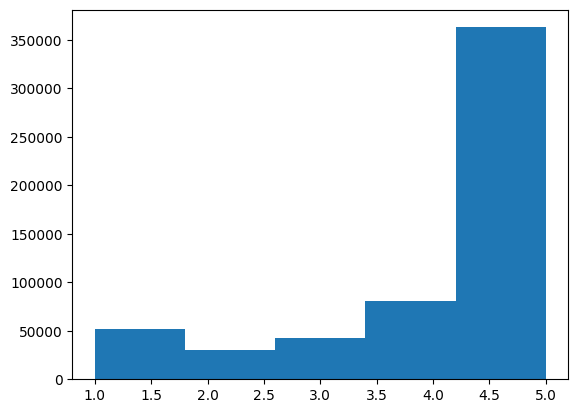

Score
1     52268
2     29769
3     42640
4     80655
5    363122
Name: Id, dtype: int64


In [5]:
# The histogram reveals this dataset is highly unbalanced towards high rating.
df.Score.hist(bins=5,grid=False)
plt.show()
print(df.groupby('Score').count().Id)

In [8]:
score_1 = df[df['Score'] == 1].sample(n=29769)
score_2 = df[df['Score'] == 2].sample(n=29769)
score_3 = df[df['Score'] == 3].sample(n=29769)
score_4 = df[df['Score'] == 4].sample(n=29769)
score_5 = df[df['Score'] == 5].sample(n=29769)

# Here we recreate a 'balanced' dataset.
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

# Printing count by 'Score' to check dataset is now balanced.
print(reviews_sample.groupby('Score').count().Id)

Score
1    29769
2    29769
3    29769
4    29769
5    29769
Name: Id, dtype: int64


In [10]:
df = reviews_sample.copy()

In [11]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,76247,B0036EYL8E,A2SG0MBQE6L0MD,"joanswitches ""joanswitches""",2,7,1,1274054400,AWFUL!! Not worth the bottle its packaged in!,"This drink is tasteless, it tastes like watere..."
1,375901,B000ES17H8,A2VC8GVTTU60YO,TZ2DSR,7,8,1,1228089600,Made in China,Why gamble with your dog's health? These are m...
2,234401,B003DQ6A2U,A1OYUUSN3BM1LB,"Liquid Silver ""Lo""",0,0,1,1347580800,Any claims of the beef being true Kobe are false,"As one reviewer said, it is illegal to sell Ko..."
3,387024,B004EE2UR4,ALA8CJBT9WBY0,LKH,0,0,1,1335052800,Couldn't even finish one cup,I'm an avid chai drinker--many different varie...
4,170515,B0002MBG1S,A2V5T2AFLP1NXR,Barbara Broadhurst,5,9,1,1268697600,No taste,The mushrooms I received had absolutely no fla...
...,...,...,...,...,...,...,...,...,...,...
148840,284717,B001P3NU4E,A29A17MY4959VJ,M. G. Miller,0,0,5,1350259200,one of my cats loves them,"I have 2 cats, one male and one female. The m..."
148841,41193,B000SATUWG,A1G9SGPLVKDFRF,"Gilbert Baca ""Gil""",1,1,5,1256515200,Delicious!,These are so delicious! Even people who don't...
148842,264206,B004EAGP74,A3THPWFH5JQGUR,Dan,0,0,5,1288051200,Happy customer,"Before this, I used Spectrum Naturals organic ..."
148843,450443,B000LR7QOA,A2OOQMIYF8XQST,Elizabeth Jones,11,12,5,1193702400,Yum!,I was very happy with both the caviar and the ...


### Pre-processing

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
from textblob import Word
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
df['Text'].iloc[3]

"I'm an avid chai drinker--many different varieties of both lattes and straight black tea.  We purchased this product because we noticed that the Cafe Escapes chai lattes--a sweeter, creamier blend--did not actually have much black tea in it, and we still wanted our morning caffeine.  Neither my husband nor I could finish one mug of this stuff, and we will end up getting rid of the box.  It was that awful. There was none of the subtle spice blending--just a watery slightly clove-tasting flavor undercut by a bitterness that almost had hints of coffee. Adding a little milk, as we usually do, didn't help at all.  If you enjoy chai, I'd recommend Bigalow or Tazo and skip this one."

In [17]:
# Lower casing and removing punctuations
df['Text'] = df['Text'].str.lower()
df['Text'] = df['Text'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))

In [18]:
df['Text'].iloc[3]

'i m an avid chai drinker  many different varieties of both lattes and straight black tea   we purchased this product because we noticed that the cafe escapes chai lattes  a sweeter  creamier blend  did not actually have much black tea in it  and we still wanted our morning caffeine   neither my husband nor i could finish one mug of this stuff  and we will end up getting rid of the box   it was that awful  there was none of the subtle spice blending  just a watery slightly clove tasting flavor undercut by a bitterness that almost had hints of coffee  adding a little milk  as we usually do  didn t help at all   if you enjoy chai  i d recommend bigalow or tazo and skip this one '

In [19]:
# Sau đó gộp lại cho gọn (loại khoảng trắng thừa)
df['Text'] = df['Text'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

In [20]:
df['Text'].iloc[3]

'i m an avid chai drinker many different varieties of both lattes and straight black tea we purchased this product because we noticed that the cafe escapes chai lattes a sweeter creamier blend did not actually have much black tea in it and we still wanted our morning caffeine neither my husband nor i could finish one mug of this stuff and we will end up getting rid of the box it was that awful there was none of the subtle spice blending just a watery slightly clove tasting flavor undercut by a bitterness that almost had hints of coffee adding a little milk as we usually do didn t help at all if you enjoy chai i d recommend bigalow or tazo and skip this one'

In [21]:
df['Text']

0         this drink is tasteless it tastes like watered...
1         why gamble with your dog s health these are ma...
2         as one reviewer said it is illegal to sell kob...
3         i m an avid chai drinker many different variet...
4         the mushrooms i received had absolutely no fla...
                                ...                        
148840    i have 2 cats one male and one female the male...
148841    these are so delicious even people who don t l...
148842    before this i used spectrum naturals organic c...
148843    i was very happy with both the caviar and the ...
148844    i switched my kitties to weruva a few months a...
Name: Text, Length: 148845, dtype: object

In [ ]:
# Spelling correction
# df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))

In [22]:
# Lemmatization
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

### Remove NaN values

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148845 entries, 0 to 148844
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      148845 non-null  int64 
 1   ProductId               148845 non-null  object
 2   UserId                  148845 non-null  object
 3   ProfileName             148836 non-null  object
 4   HelpfulnessNumerator    148845 non-null  int64 
 5   HelpfulnessDenominator  148845 non-null  int64 
 6   Score                   148845 non-null  int64 
 7   Time                    148845 non-null  int64 
 8   Summary                 148819 non-null  object
 9   Text                    148845 non-null  object
dtypes: int64(5), object(5)
memory usage: 11.4+ MB


In [25]:
df.dropna(inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148810 entries, 0 to 148844
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      148810 non-null  int64 
 1   ProductId               148810 non-null  object
 2   UserId                  148810 non-null  object
 3   ProfileName             148810 non-null  object
 4   HelpfulnessNumerator    148810 non-null  int64 
 5   HelpfulnessDenominator  148810 non-null  int64 
 6   Score                   148810 non-null  int64 
 7   Time                    148810 non-null  int64 
 8   Summary                 148810 non-null  object
 9   Text                    148810 non-null  object
dtypes: int64(5), object(5)
memory usage: 12.5+ MB


In [27]:
# Save preprocessing data
df.to_csv('preprocessing_data.csv', index=False)

### Data exploration

In [30]:
reviews_df = pd.read_csv("preprocessing_data.csv")
print(reviews_df.shape)

(148810, 10)


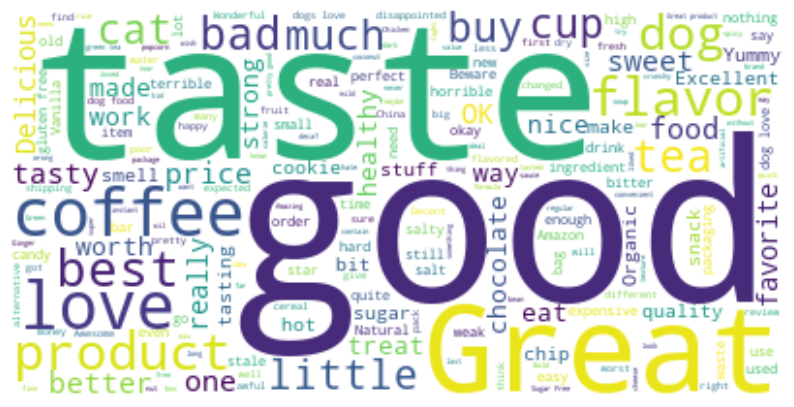

In [32]:
# Let's build a word cloud looking at the 'Summary'  text
from wordcloud import WordCloud
from wordcloud import STOPWORDS
# Word Cloud function's input needs to be a single string of text.
# Here I'm concatenating all Summaries into a single string.
# similarly you can build for Text column
reviews_str = reviews_sample.Summary.str.cat()

wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

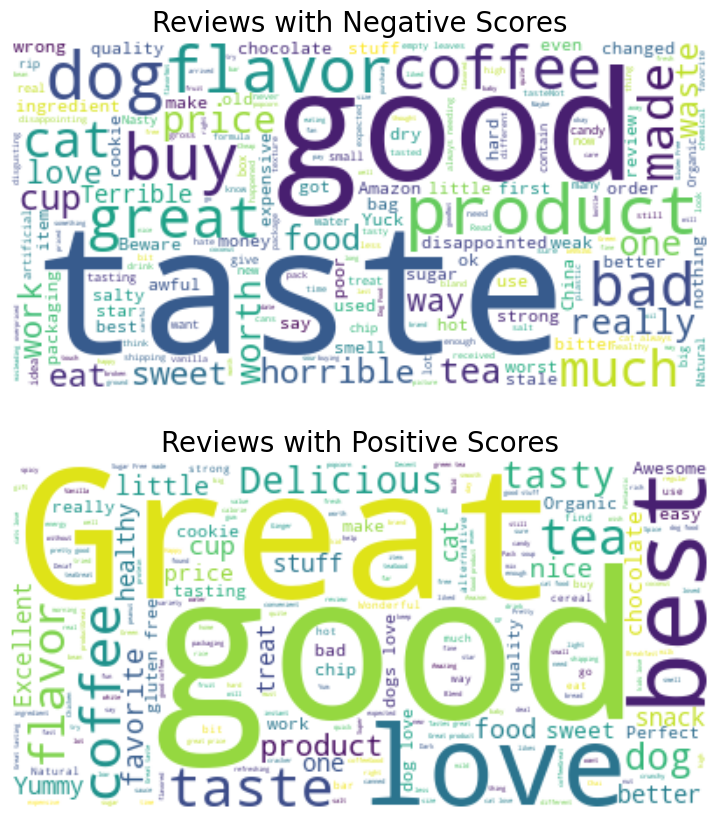

In [ ]:
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2]) ]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5]) ]


# Transform to single string
negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()


# Create wordclouds
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_str)


# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)

plt.show()


### Building the model

In [35]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [36]:
analyzer = SentimentIntensityAnalyzer()

In [37]:
# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in df['Text']:
   vs=analyzer.polarity_scores(row)
   emptyline.append(vs)

# Creating new dataframe with sentiments
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head(5)

,neg,neu,pos,compound
0,0.146,0.728,0.127,-0.0516
1,0.062,0.881,0.057,-0.1027
2,0.041,0.798,0.160,0.9382
3,0.041,0.857,0.102,0.7579
4,0.226,0.680,0.094,-0.5402


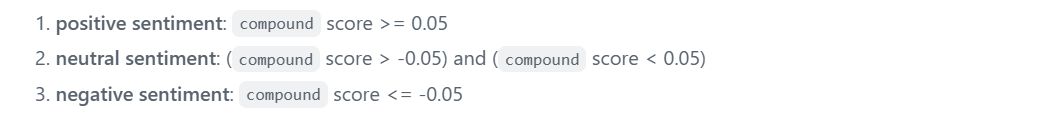

In [42]:
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [43]:
# Merging the sentiments back to reviews dataframe
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(5)

# Convert scores into positive and negative sentiments using some threshold
df_c['Sentiment'] = df_c['compound'].apply(classify_sentiment)
df_c.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound,Sentiment
0,76247,B0036EYL8E,A2SG0MBQE6L0MD,"joanswitches ""joanswitches""",2,7,1,1274054400,AWFUL!! Not worth the bottle its packaged in!,this drink is tasteless it taste like watered ...,0.146,0.728,0.127,-0.0516,Negative
1,375901,B000ES17H8,A2VC8GVTTU60YO,TZ2DSR,7,8,1,1228089600,Made in China,why gamble with your dog s health these are ma...,0.062,0.881,0.057,-0.1027,Negative
2,234401,B003DQ6A2U,A1OYUUSN3BM1LB,"Liquid Silver ""Lo""",0,0,1,1347580800,Any claims of the beef being true Kobe are false,a one reviewer said it is illegal to sell kobe...,0.041,0.798,0.160,0.9382,Positive
3,387024,B004EE2UR4,ALA8CJBT9WBY0,LKH,0,0,1,1335052800,Couldn't even finish one cup,i m an avid chai drinker many different variet...,0.041,0.857,0.102,0.7579,Positive
4,170515,B0002MBG1S,A2V5T2AFLP1NXR,Barbara Broadhurst,5,9,1,1268697600,No taste,the mushroom i received had absolutely no flav...,0.226,0.680,0.094,-0.5402,Negative


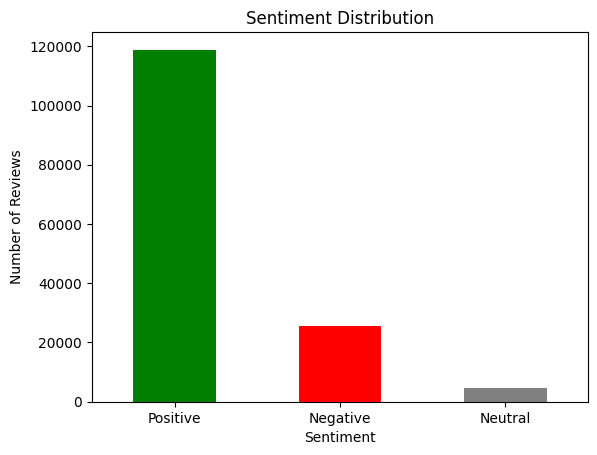

In [48]:
import matplotlib.pyplot as plt

# Lấy kết quả phân phối sentiment
result = df_c['Sentiment'].value_counts()

# Ánh xạ sentiment sang màu
colors = {
    'Positive': 'green',
    'Negative': 'red',
    'Neutral': 'gray'
}

# Tạo list màu theo đúng thứ tự index trong value_counts()
color_list = [colors[sentiment] for sentiment in result.index]

# Vẽ biểu đồ
result.plot(kind='bar', rot=0, color=color_list)

plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

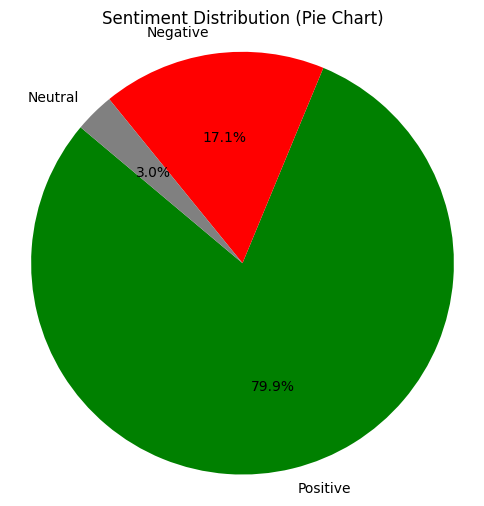

In [50]:
import matplotlib.pyplot as plt

# Lấy lại phân phối sentiment
result = df_c['Sentiment'].value_counts()

# Màu tương ứng từng loại
colors = {
    'Positive': 'green',
    'Negative': 'red',
    'Neutral': 'gray'
}
color_list = [colors[sentiment] for sentiment in result.index]

# Vẽ biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(result, labels=result.index, autopct='%1.1f%%', colors=color_list, startangle=140)

plt.title('Sentiment Distribution (Pie Chart)')
plt.axis('equal')  # Đảm bảo hình tròn
plt.show()